# Explore here

In [1]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [2]:
total_data.to_csv("../data/raw/total_data.csv", index = False)

4Geeks.Version

In [3]:
len(total_data)

48895

Kaggle.Version

In [4]:
# Obtain dimensions
total_data.shape

(48895, 16)

In [5]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
total_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
#examing the changes
total_data.drop(["name","reviews_per_month"], axis = 1, inplace = True)
total_data.head()

id  host_id    host_name neighbourhood_group neighbourhood  latitude  \
0  2539     2787         John            Brooklyn    Kensington  40.64749   
1  2595     2845     Jennifer           Manhattan       Midtown  40.75362   
2  3647     4632    Elisabeth           Manhattan        Harlem  40.80902   
3  3831     4869  LisaRoxanne            Brooklyn  Clinton Hill  40.68514   
4  5022     7192        Laura           Manhattan   East Harlem  40.79851   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0  -73.97237     Private room    149               1                  9   
1  -73.98377  Entire home/apt    225               1                 45   
2  -73.94190     Private room    150               3                  0   
3  -73.95976  Entire home/apt     89               1                270   
4  -73.94399  Entire home/apt     80              10                  9   

  last_review  calculated_host_listings_count  availability_365  
0  2018-10-19                               6               365  
1  2019-05-21                               2               355  
2         NaN                               1               365  
3  2019-07-05                               1               194  
4  2018-11-19                               1                 0

In [8]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
total_data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(total_data.neighbourhood.unique())

221

In [10]:
#examining the unique values of room_type as this column will appear very handy for later analysis
total_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [11]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on total_data platform and taking advantage of this service
top_host=total_data.host_id.value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [12]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=total_data.calculated_host_listings_count.max()
top_host_check

327

In [13]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [14]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

P_Count  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    7503643     52

In [15]:
print(top_host_df.columns)

Index(['P_Count', 'count'], dtype='object')


In [16]:
host_counts = total_data.groupby('host_id').size().reset_index(name='P_Count')

/tmp/ipykernel_585/1956186197.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_1 = sns.barplot(x="host_id", y="P_Count", data=top_hosts, palette='Blues_d')
/tmp/ipykernel_585/1956186197.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)


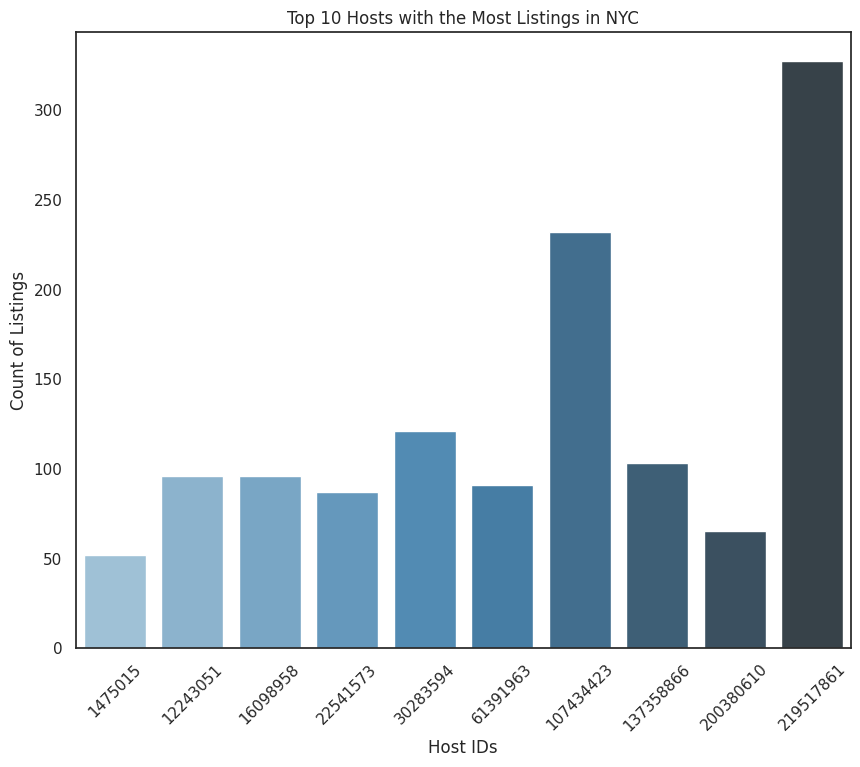

In [17]:
top_hosts = host_counts.sort_values(by='P_Count', ascending=False).head(10)

viz_1 = sns.barplot(x="host_id", y="P_Count", data=top_hosts, palette='Blues_d')
viz_1.set_title('Top 10 Hosts with the Most Listings in NYC')
viz_1.set_ylabel('Count of Listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)
plt.show()

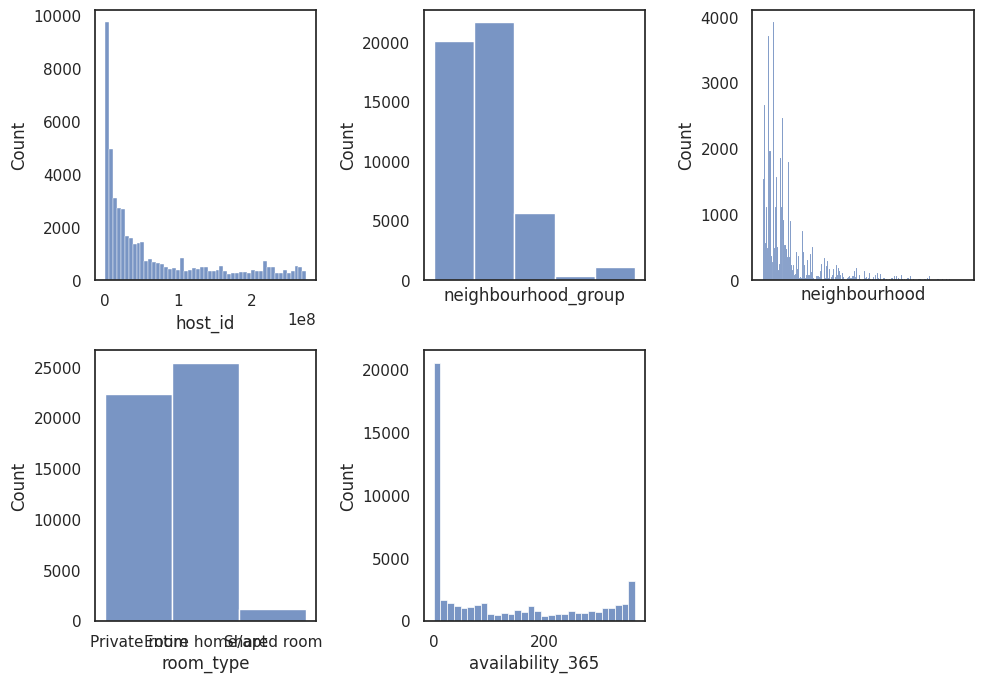

In [18]:
fig, axis = plt.subplots(2, 3, figsize=(10, 7))

# Create Histogram
sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type")
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
fig.delaxes(axis[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

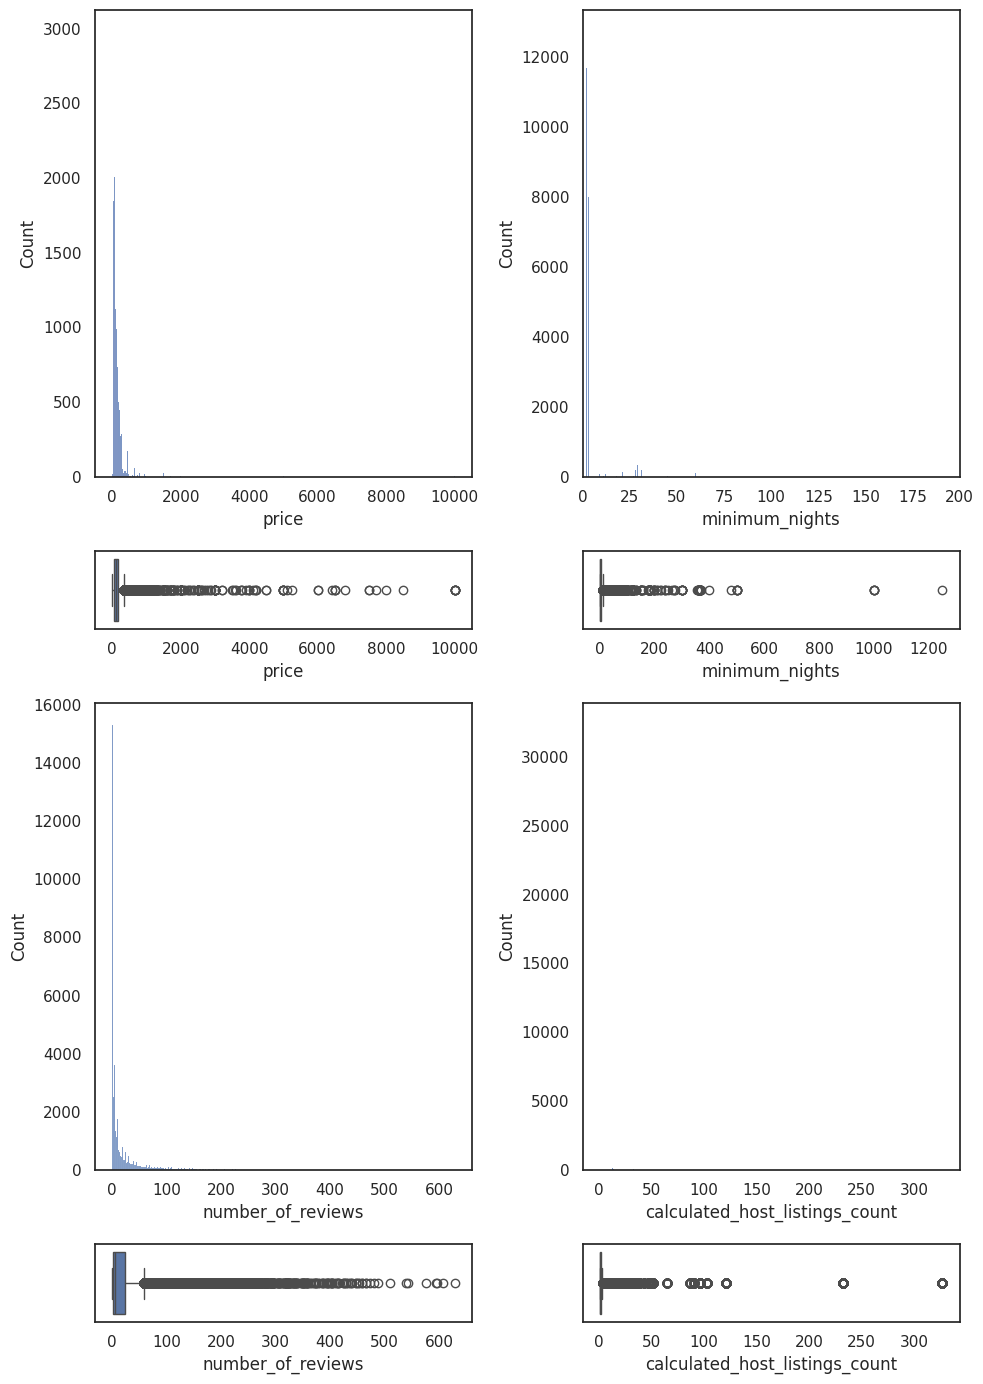

In [19]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

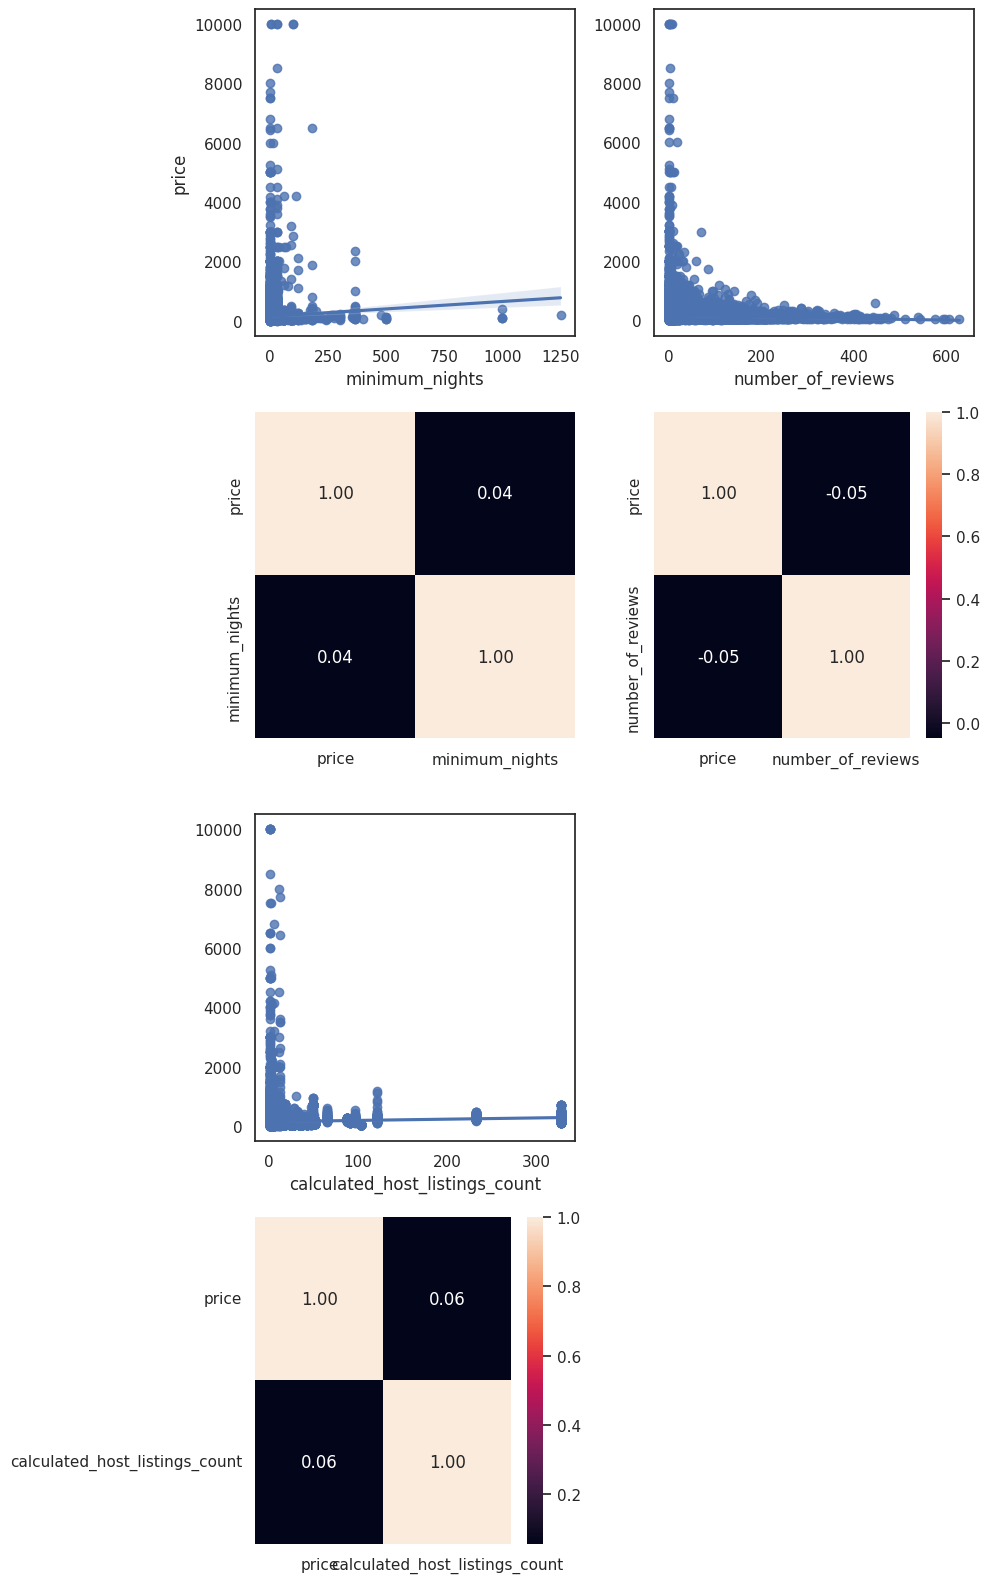

In [20]:
# Numerical - Numerical Analysis

# Create subplot canvas
fig, axis = plt.subplots(4, 2, figsize = (10, 16))

# Create Plates 
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [21]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(total_data.neighbourhood.unique())

221

In [22]:
#examining the unique values of room_type as this column will appear very handy for later analysis
total_data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [23]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on total_data platform and taking advantage of this service
top_host=total_data.host_id.value_counts().head(10)
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [24]:
top_host_check=total_data.calculated_host_listings_count.max()
top_host_check

327

In [25]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [26]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

P_Count  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    7503643     52

In [27]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=total_data.loc[total_data['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=total_data.loc[total_data['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=total_data.loc[total_data['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=total_data.loc[total_data['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=total_data.loc[total_data['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [28]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

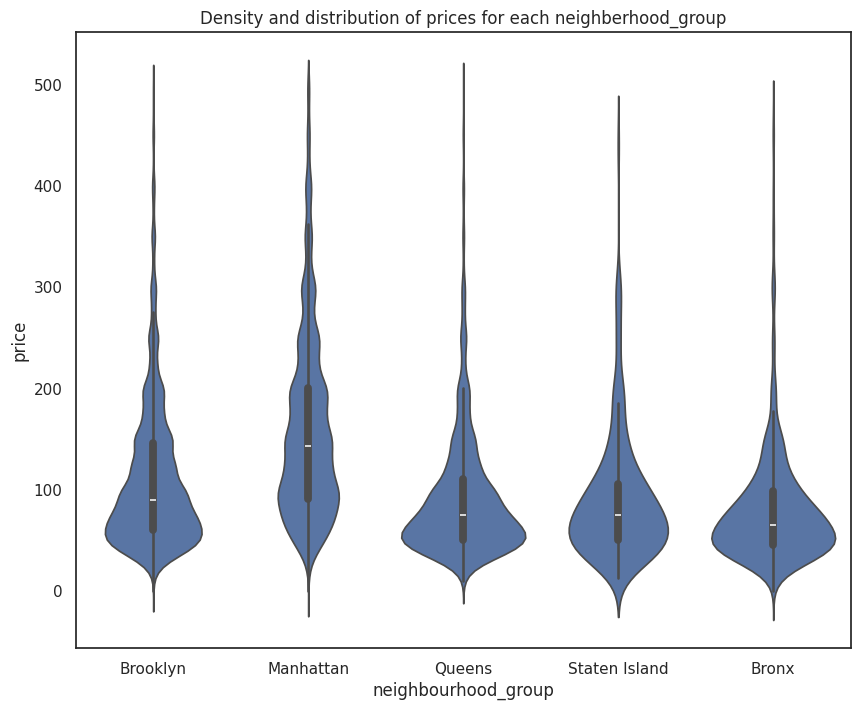

In [29]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=total_data[total_data.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

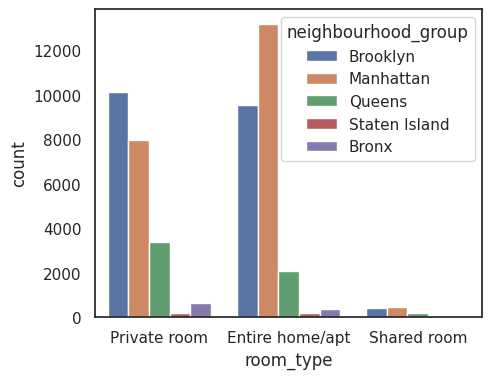

In [30]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

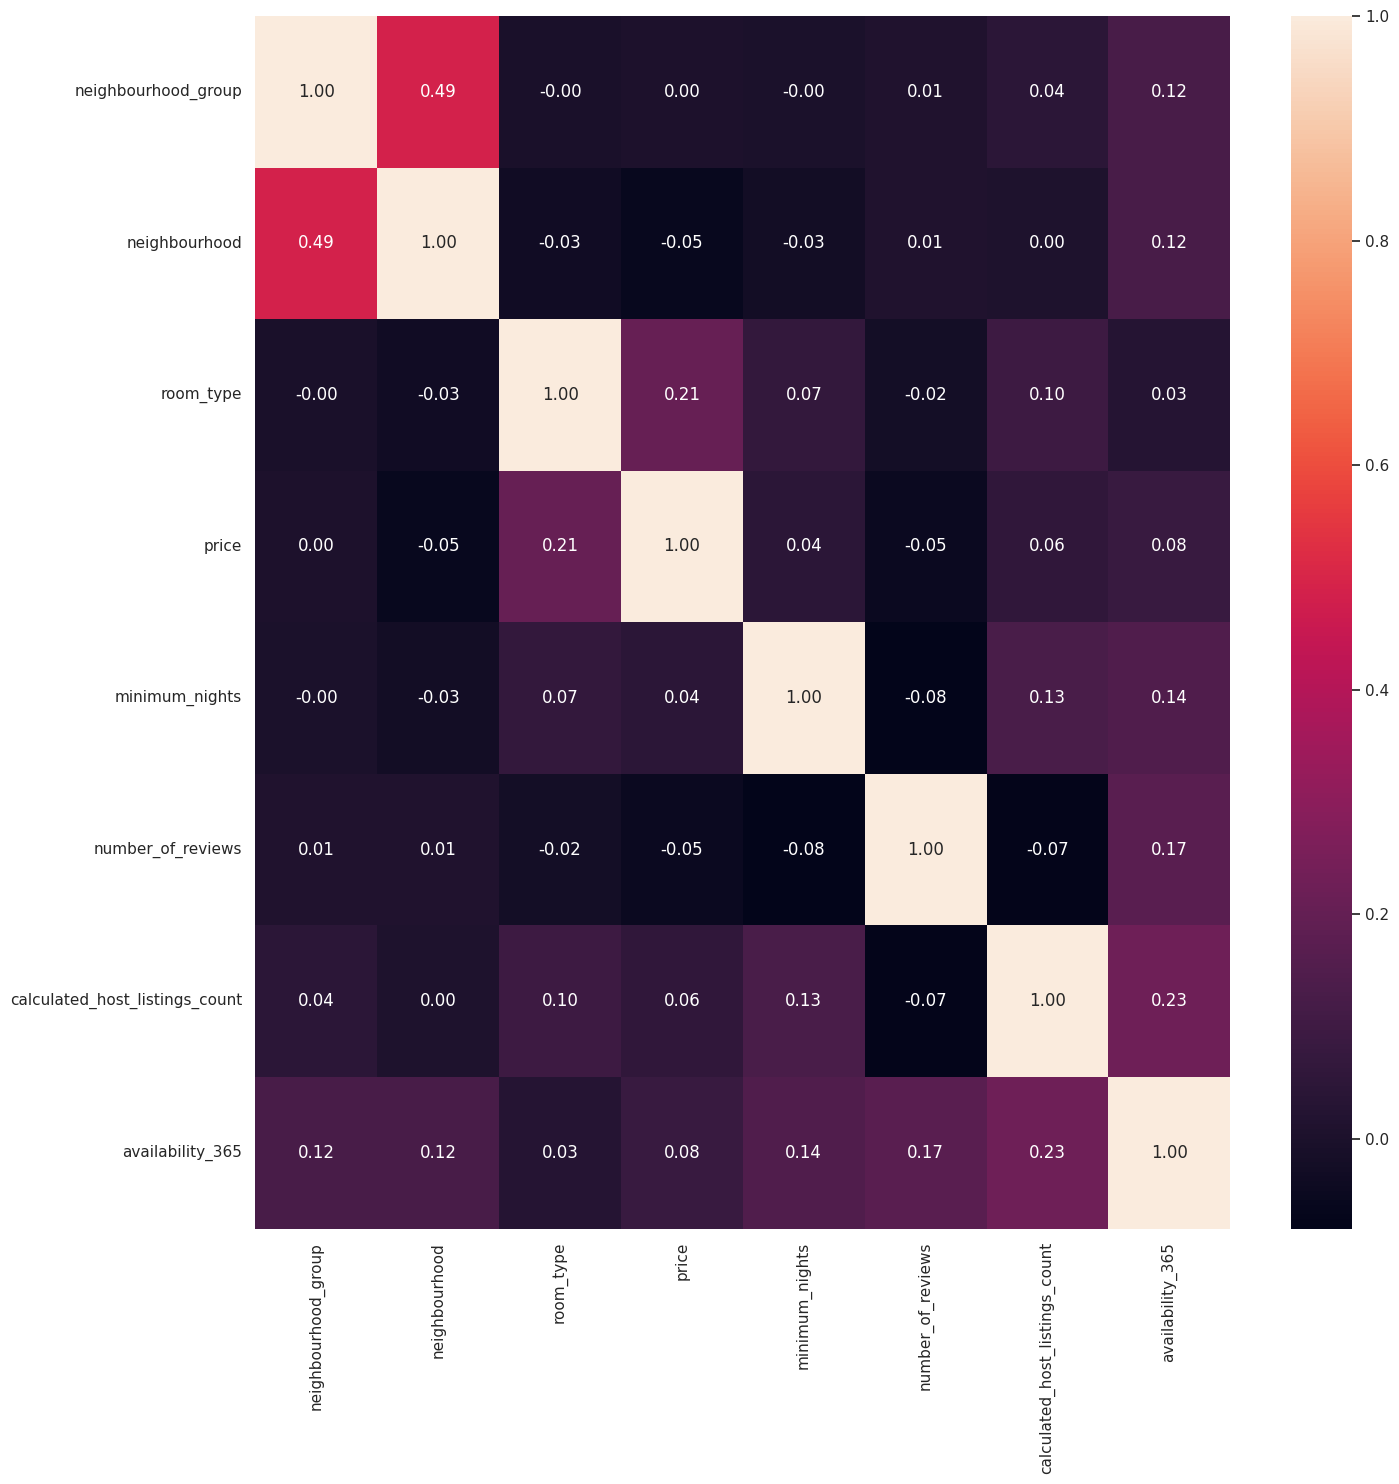

In [31]:
# Factorize the Room Type and Neighbourhood Data
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(total_data[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()


In [32]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
total_data.neighbourhood.value_counts().head(10)

neighbourhood
12    3920
6     3714
2     2658
21    2465
8     1971
7     1958
19    1853
28    1798
15    1564
1     1545
Name: count, dtype: int64

In [33]:
print(total_data.head())

     id  host_id    host_name  neighbourhood_group  neighbourhood  latitude  \
0  2539     2787         John                    0              0  40.64749   
1  2595     2845     Jennifer                    1              1  40.75362   
2  3647     4632    Elisabeth                    1              2  40.80902   
3  3831     4869  LisaRoxanne                    0              3  40.68514   
4  5022     7192        Laura                    1              4  40.79851   

   longitude  room_type  price  minimum_nights  number_of_reviews last_review  \
0  -73.97237          0    149               1                  9  2018-10-19   
1  -73.98377          1    225               1                 45  2019-05-21   
2  -73.94190          0    150               3                  0         NaN   
3  -73.95976          1     89               1                270  2019-07-05   
4  -73.94399          1     80              10                  9  2018-11-19   

   calculated_host_listings_count  ava

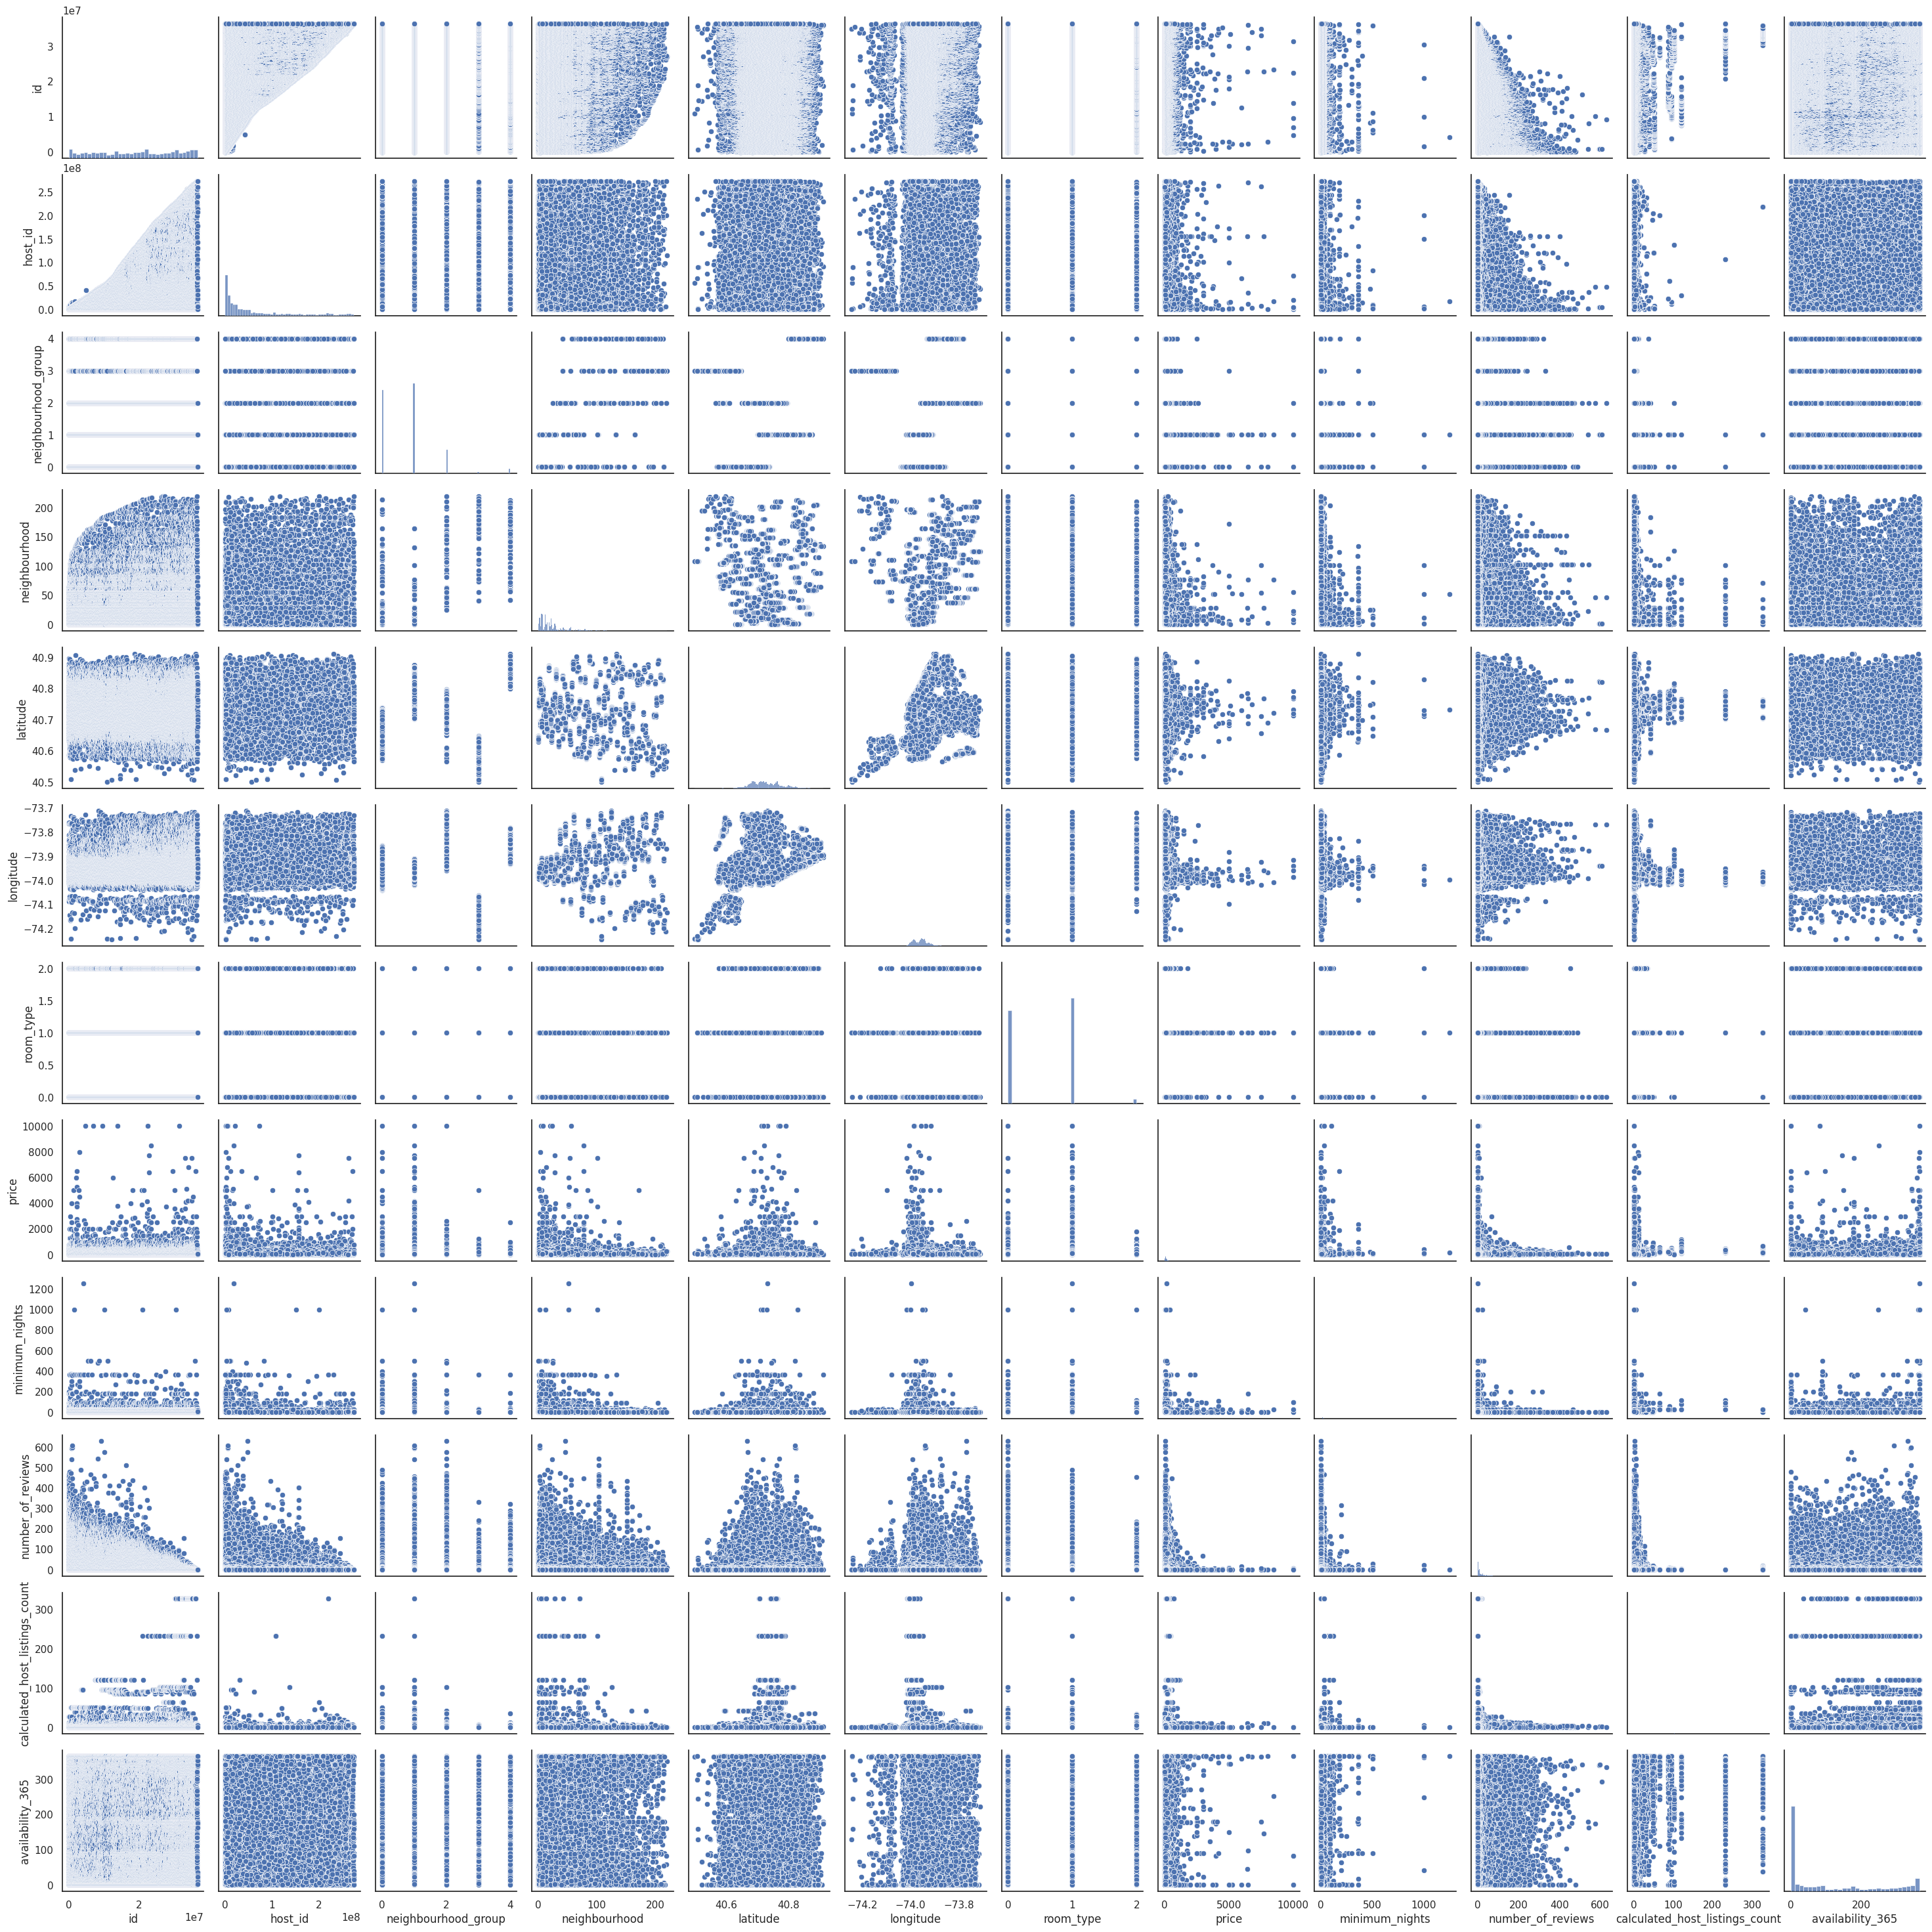

In [34]:
sns.pairplot(data = total_data)

In [35]:
total_data.describe()


id       host_id  neighbourhood_group  neighbourhood  \
count  4.889500e+04  4.889500e+04         48895.000000   48895.000000   
mean   1.901714e+07  6.762001e+07             0.786911      29.888782   
std    1.098311e+07  7.861097e+07             0.844386      34.676634   
min    2.539000e+03  2.438000e+03             0.000000       0.000000   
25%    9.471945e+06  7.822033e+06             0.000000       7.500000   
50%    1.967728e+07  3.079382e+07             1.000000      19.000000   
75%    2.915218e+07  1.074344e+08             1.000000      37.000000   
max    3.648724e+07  2.743213e+08             4.000000     220.000000   

           latitude     longitude     room_type         price  minimum_nights  \
count  48895.000000  48895.000000  48895.000000  48895.000000    48895.000000   
mean      40.728949    -73.952170      0.567113    152.720687        7.029962   
std        0.054530      0.046157      0.541249    240.154170       20.510550   
min       40.499790    -74.244420      0.000000      0.000000        1.000000   
25%       40.690100    -73.983070      0.000000     69.000000        1.000000   
50%       40.723070    -73.955680      1.000000    106.000000        3.000000   
75%       40.763115    -73.936275      1.000000    175.000000        5.000000   
max       40.913060    -73.712990      2.000000  10000.000000     1250.000000   

       number_of_reviews  calculated_host_listings_count  availability_365  
count       48895.000000                    48895.000000      48895.000000  
mean           23.274466                        7.143982        112.781327  
std            44.550582                       32.952519        131.622289  
min             0.000000                        1.000000          0.000000  
25%             1.000000                        1.000000          0.000000  
50%             5.000000                        1.000000         45.000000  
75%            24.000000                        2.000000        227.000000  
max           629.000000                      327.000000        365.000000

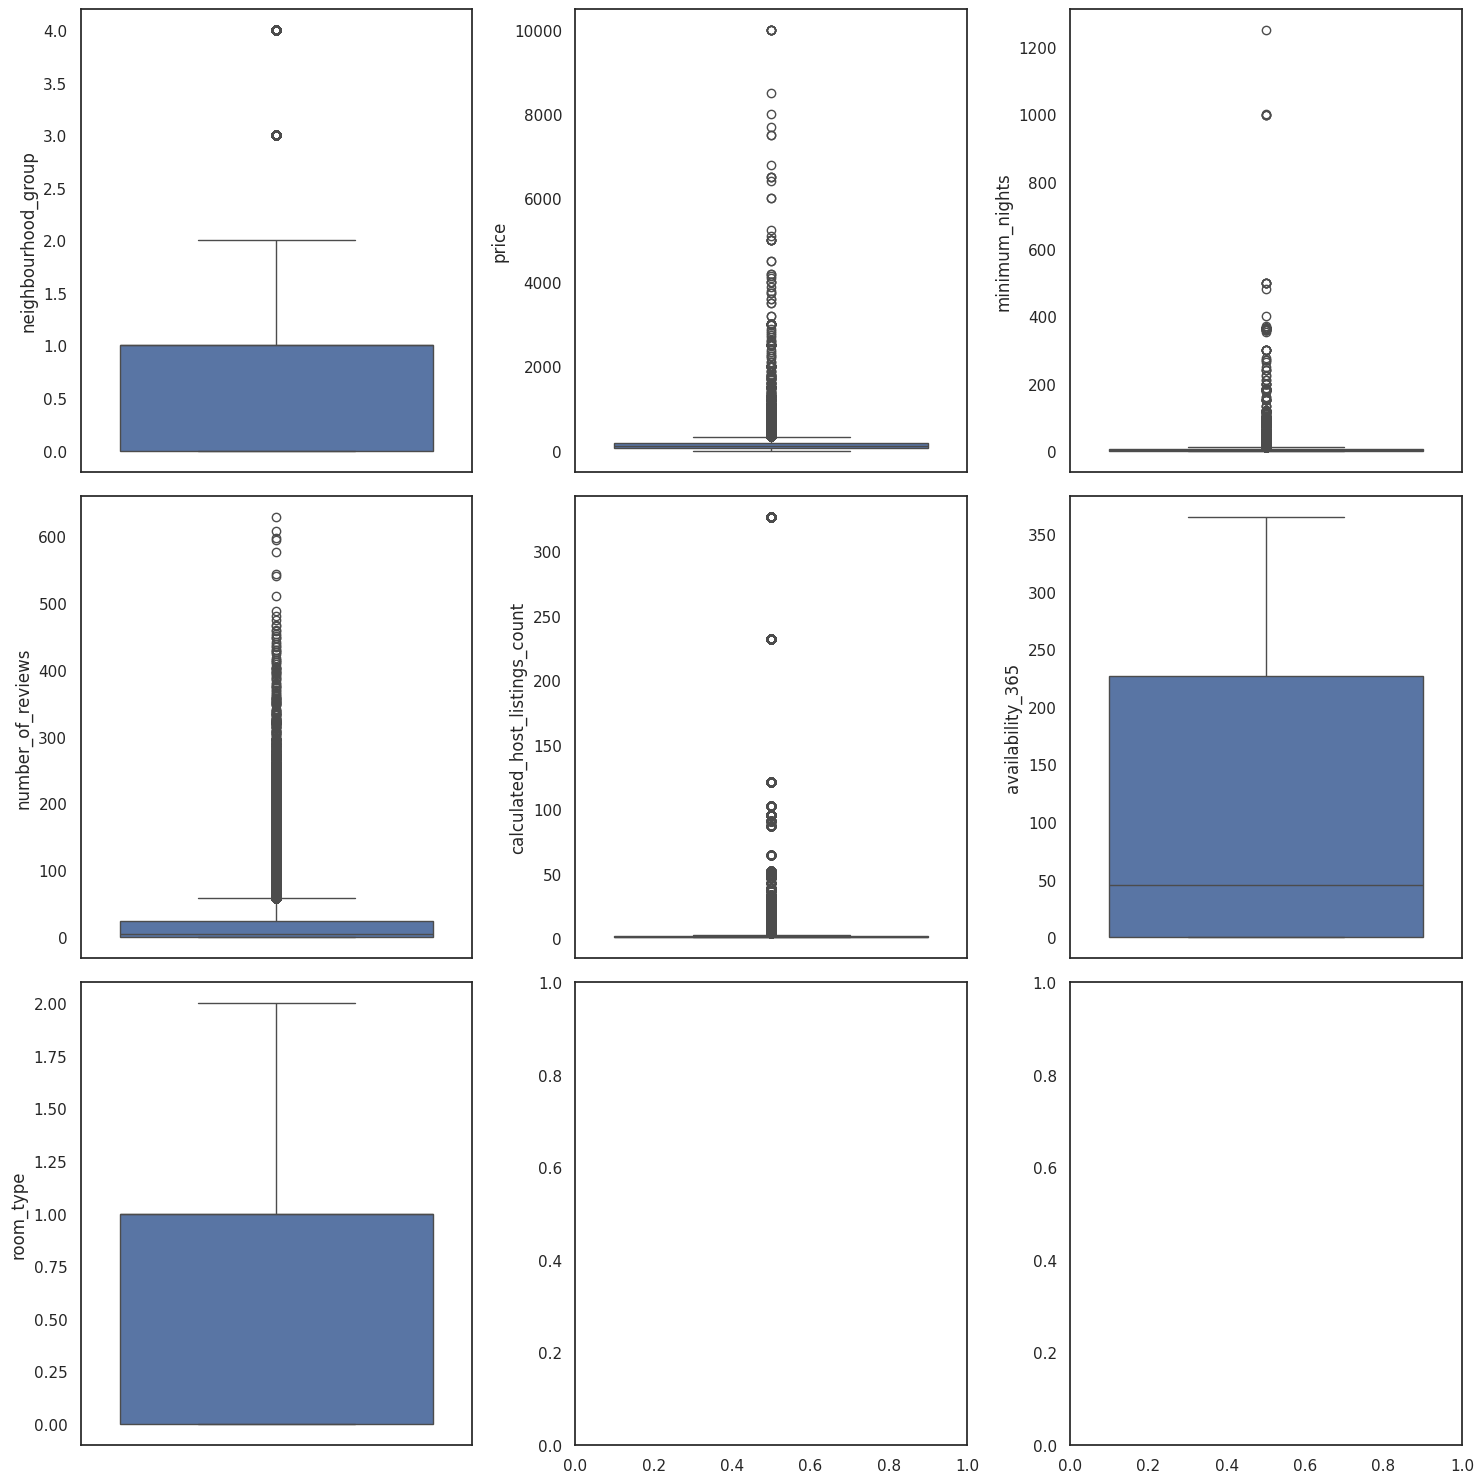

In [36]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = total_data, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = total_data, y = "price")
sns.boxplot(ax = axes[0, 2], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = total_data, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = total_data, y = "room_type")

plt.tight_layout()

plt.show()

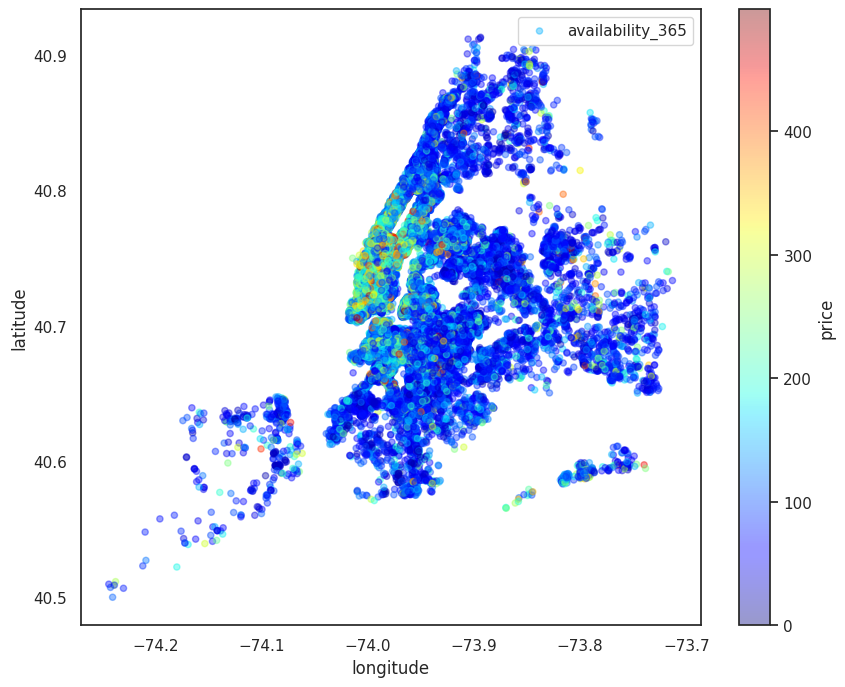

In [37]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

In [38]:
# Stats for Price
price_stats = total_data["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [39]:
# IQR for Price

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")


The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [40]:
# Clean the outliers

total_data = total_data[total_data["price"] > 0]

In [41]:
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [42]:
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [43]:
# IQR for minimum_nights
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [44]:
# Clean the outliers

total_data = total_data[total_data["minimum_nights"] <= 15]

In [45]:
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


In [46]:
# Stats for number_of_reviews

review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [47]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=total_data.nlargest(10,'number_of_reviews')
top_reviewed_listings

id   host_id host_name  neighbourhood_group  neighbourhood  \
11759   9145202  47621202      Dona                    2             46   
2031     903972   4734398        Jj                    1              2   
2030     903947   4734398        Jj                    1              2   
2015     891117   4734398        Jj                    1              2   
13495  10101135  47621202      Dona                    2             46   
10623   8168619  37312959      Maya                    2            103   
1879     834190   2369681     Carol                    1             23   
20403  16276632  26432133  Danielle                    2            103   
4870    3474320  12949460       Asa                    0             16   
471      166172    792159     Wanda                    0             21   

       latitude  longitude  room_type  price  minimum_nights  \
11759  40.66730  -73.76831          0     47               1   
2031   40.82085  -73.94025          0     49               1   
2030   40.82124  -73.93838          0     49               1   
2015   40.82264  -73.94041          0     49               1   
13495  40.66939  -73.76975          0     47               1   
10623  40.77006  -73.87683          0     46               1   
1879   40.71921  -73.99116          0     99               2   
20403  40.76335  -73.87007          0     48               1   
4870   40.67926  -73.97711          1    160               1   
471    40.70283  -73.92131          0     60               3   

       number_of_reviews last_review  calculated_host_listings_count  \
11759                629  2019-07-05                               2   
2031                 607  2019-06-21                               3   
2030                 597  2019-06-23                               3   
2015                 594  2019-06-15                               3   
13495                576  2019-06-27                               2   
10623                543  2019-07-01                               5   
1879                 540  2019-07-06                               1   
20403                510  2019-07-06                               5   
4870                 488  2019-07-01                               1   
471                  480  2019-07-07                               1   

       availability_365  
11759               333  
2031                293  
2030                342  
2015                339  
13495               173  
10623               163  
1879                179  
20403               341  
4870                269  
471                   0

In [48]:
# IQR for number_of_reviews

review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")


The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


In [49]:
# Stats for calculated_host_listings_count

hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [50]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=total_data.nlargest(10,'number_of_reviews')
top_reviewed_listings

id   host_id host_name  neighbourhood_group  neighbourhood  \
11759   9145202  47621202      Dona                    2             46   
2031     903972   4734398        Jj                    1              2   
2030     903947   4734398        Jj                    1              2   
2015     891117   4734398        Jj                    1              2   
13495  10101135  47621202      Dona                    2             46   
10623   8168619  37312959      Maya                    2            103   
1879     834190   2369681     Carol                    1             23   
20403  16276632  26432133  Danielle                    2            103   
4870    3474320  12949460       Asa                    0             16   
471      166172    792159     Wanda                    0             21   

       latitude  longitude  room_type  price  minimum_nights  \
11759  40.66730  -73.76831          0     47               1   
2031   40.82085  -73.94025          0     49               1   
2030   40.82124  -73.93838          0     49               1   
2015   40.82264  -73.94041          0     49               1   
13495  40.66939  -73.76975          0     47               1   
10623  40.77006  -73.87683          0     46               1   
1879   40.71921  -73.99116          0     99               2   
20403  40.76335  -73.87007          0     48               1   
4870   40.67926  -73.97711          1    160               1   
471    40.70283  -73.92131          0     60               3   

       number_of_reviews last_review  calculated_host_listings_count  \
11759                629  2019-07-05                               2   
2031                 607  2019-06-21                               3   
2030                 597  2019-06-23                               3   
2015                 594  2019-06-15                               3   
13495                576  2019-06-27                               2   
10623                543  2019-07-01                               5   
1879                 540  2019-07-06                               1   
20403                510  2019-07-06                               5   
4870                 488  2019-07-01                               1   
471                  480  2019-07-07                               1   

       availability_365  
11759               333  
2031                293  
2030                342  
2015                339  
13495               173  
10623               163  
1879                179  
20403               341  
4870                269  
471                   0

In [51]:
# IQR for calculated_host_listings_count

hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [52]:
count_04 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_04)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [53]:
# Clean the outliers

total_data = total_data[total_data["calculated_host_listings_count"] > 4]

In [54]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


In [55]:
# Count NaN
total_data.isnull().sum().sort_values(ascending = False)

last_review                       442
id                                  0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [56]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

number_of_reviews  minimum_nights  calculated_host_listings_count  \
0            0.016575        0.000000                        0.003106   
21           0.239411        0.071429                        0.003106   
22           0.071823        0.000000                        0.003106   
23           0.130755        0.071429                        0.003106   
92           0.029466        0.428571                        0.003106   

    availability_365  neighbourhood_group  room_type  price  
0           1.000000                  0.0        0.0    149  
21          0.950685                  0.0        0.0    130  
22          0.997260                  0.0        0.0     80  
23          0.832877                  0.0        0.0    110  
92          0.506849                  0.0        0.0     98

In [57]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

minimum_nights  calculated_host_listings_count  availability_365  room_type
0        0.000000                        0.000000          0.846575        0.0
1        0.071429                        1.000000          0.169863        0.5
2        0.071429                        0.000000          1.000000        0.0
3        0.428571                        0.130435          0.926027        0.0
4        0.071429                        1.000000          0.778082        0.5

In [58]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)